# Content Based Filtering
---

In [2]:
import os
import pandas as pd
from ast import literal_eval
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## General Settings

In [3]:
#Define Saving Dir
baseDir = os.getcwd()+'\\data\\PreProcessorData'

## Building Model

In [3]:
product = pd.read_csv(baseDir+'\\product.csv', index_col='ID', converters={'Tags':literal_eval})
product.head()

,Tags
ID,
2374069313,"[Africa, Blend, Central America, Chocolate, Es..."
6903008775,"[Asia & Pacific, Blend, Bold, Caramel, Chocola..."
6811920695393,"[Anaerobic, Asia & Pacific, Best Coffee, Filte..."
452304175135,"[Bestseller, Blend, Bold, Caramel, Chocolate, ..."
1419084071009,"[Blend, Bold, Chocolate, Espresso, Malaysia, M..."


In [4]:
def dummyAnalyzer(x):
    return x

#vectorizer = CountVectorizer(analyzer=dummyAnalyzer)
vectorizer = TfidfVectorizer(analyzer=dummyAnalyzer)

X = vectorizer.fit_transform(product.Tags)
X.shape

(80, 112)

In [5]:
model = pd.DataFrame(data=cosine_similarity(X), columns=product.index, index=product.index)
model.head()

ID,2374069313,6903008775,6811920695393,452304175135,1419084071009,11300571975,464439297,1850379265,1419080040545,1419071258721,...,762479706209,7004871688289,7015596392545,7020214878305,7020216746081,762476626017,6977998258273,7027545145441,7015596752993,4854625271905
ID,,,,,,,,,,,,,,,,,,,,,
2374069313,1.000000,0.533290,0.104497,0.277929,0.337452,0.272068,0.256159,0.360122,0.296147,0.372379,...,0.194440,0.322201,0.128622,0.175511,0.294379,0.149237,0.079288,0.175648,0.104317,0.241206
6903008775,0.533290,1.000000,0.084336,0.319705,0.329183,0.321845,0.363030,0.403415,0.228894,0.354260,...,0.113986,0.229323,0.068418,0.069012,0.139331,0.224273,0.083768,0.097502,0.075964,0.110002
6811920695393,0.104497,0.084336,1.000000,0.027469,0.105704,0.138844,0.096846,0.100709,0.105271,0.104137,...,0.174998,0.130678,0.297267,0.204829,0.168196,0.064821,0.171594,0.179383,0.352009,0.300061
452304175135,0.277929,0.319705,0.027469,1.000000,0.514592,0.342189,0.387324,0.541328,0.380762,0.494524,...,0.023519,0.237706,0.049674,0.142084,0.090108,0.182343,0.028217,0.050079,0.041942,0.089712
1419084071009,0.337452,0.329183,0.105704,0.514592,1.000000,0.503117,0.325220,0.552613,0.601742,0.497324,...,0.054942,0.247665,0.240019,0.122463,0.102360,0.262256,0.202049,0.056888,0.047645,0.124521


In [6]:
model = model.reset_index()
model = model.rename(columns={'ID':'ProductID'})
model.to_csv(os.getcwd()+'\\data\\RecommenderSystem\\contentBased.csv', index=False)

## Testing Model

In [7]:
model = pd.read_csv(os.getcwd()+'\\data\\RecommenderSystem\\contentBased.csv', index_col='ProductID')
model.columns = model.columns.astype(np.int64)
model.head()

,2374069313,6903008775,6811920695393,452304175135,1419084071009,11300571975,464439297,1850379265,1419080040545,1419071258721,...,762479706209,7004871688289,7015596392545,7020214878305,7020216746081,762476626017,6977998258273,7027545145441,7015596752993,4854625271905
ProductID,,,,,,,,,,,,,,,,,,,,,
2374069313,1.000000,0.533290,0.104497,0.277929,0.337452,0.272068,0.256159,0.360122,0.296147,0.372379,...,0.194440,0.322201,0.128622,0.175511,0.294379,0.149237,0.079288,0.175648,0.104317,0.241206
6903008775,0.533290,1.000000,0.084336,0.319705,0.329183,0.321845,0.363030,0.403415,0.228894,0.354260,...,0.113986,0.229323,0.068418,0.069012,0.139331,0.224273,0.083768,0.097502,0.075964,0.110002
6811920695393,0.104497,0.084336,1.000000,0.027469,0.105704,0.138844,0.096846,0.100709,0.105271,0.104137,...,0.174998,0.130678,0.297267,0.204829,0.168196,0.064821,0.171594,0.179383,0.352009,0.300061
452304175135,0.277929,0.319705,0.027469,1.000000,0.514592,0.342189,0.387324,0.541328,0.380762,0.494524,...,0.023519,0.237706,0.049674,0.142084,0.090108,0.182343,0.028217,0.050079,0.041942,0.089712
1419084071009,0.337452,0.329183,0.105704,0.514592,1.000000,0.503117,0.325220,0.552613,0.601742,0.497324,...,0.054942,0.247665,0.240019,0.122463,0.102360,0.262256,0.202049,0.056888,0.047645,0.124521


In [8]:
preference = [
    {'ProductID': 464439297, 'Rating': 4},
    {'ProductID': 1850379265, 'Rating': 4},
    {'ProductID': 2374069313, 'Rating': 5},
    {'ProductID': 6903008775, 'Rating': 5},
    {'ProductID': 11300571975, 'Rating': 5},
    {'ProductID': 452304175135, 'Rating': 5},
    {'ProductID': 766219747425, 'Rating': 4},
    {'ProductID': 1419071258721, 'Rating': 4},
    {'ProductID': 1419080040545, 'Rating': 5},
    {'ProductID': 2028338511969, 'Rating': 5},
    {'ProductID': 4765085335649, 'Rating': 5}
]

In [9]:
def ContentBased(preference):
    preference = pd.DataFrame(preference).set_index('ProductID')['Rating']
    result = pd.DataFrame()
    for ID in preference.index:
        result = pd.concat([result, model[ID].nlargest(10)], axis=1)
    result = result.drop(preference.index)
    result = result.multiply(preference/5, axis=1)
    result = result.mean(axis=1).sort_values(ascending=False)
    return result[:3].index.to_list()

In [10]:
ContentBased(preference)

[6615204560993, 4508393078881, 1419084071009]

In [11]:
def parseFeedback(feedback, preference, keep):
    try:
        for x in feedback:
            if x['Interested'] == True:
                rating = 5            
                keep.append(x['ProductID'])
            elif x['Interested'] == False:
                rating = 1
            else:
                return False
            preference.append({'ProductID':x['ProductID'], 'Rating':rating})
            return True
    except Exception as e:
        return False

def ContentBased(preference, feedback=[]):
    
    keep = []
    if feedback and not parseFeedback(feedback, preference, keep): return False
    
    preference = pd.DataFrame(preference).set_index('ProductID')['Rating']
    result = pd.DataFrame()
    for ID in preference.index:
        result = pd.concat([result, model[ID].nlargest(10)], axis=1)
    
    if keep != []: result = result.drop([x for x in preference.index if x not in keep])
    else: result = result.drop(preference.index)
    
    result = result.multiply(preference/5, axis=1)
    result = result.mean(axis=1).sort_values(ascending=False)
    
    return result[:3].index.to_list()

In [12]:
ContentBased(preference)

[6615204560993, 4508393078881, 1419084071009]

In [13]:
ContentBased(preference, feedback=[{'ProductID':6615204560993, 'Interested':False}])

[4508393078881, 1419084071009, 10935947527]

## Log Process

In [14]:
product = pd.read_csv(baseDir+'\\product.csv', index_col='ID', converters={'Tags':literal_eval})
product.head()

,Tags
ID,
2374069313,"[Africa, Blend, Central America, Chocolate, Es..."
6903008775,"[Asia & Pacific, Blend, Bold, Caramel, Chocola..."
6811920695393,"[Anaerobic, Asia & Pacific, Best Coffee, Filte..."
452304175135,"[Bestseller, Blend, Bold, Caramel, Chocolate, ..."
1419084071009,"[Blend, Bold, Chocolate, Espresso, Malaysia, M..."


In [21]:
from io import BytesIO
import base64

def contentBasedDescription(preference):
    description = 'The recommendation is derived solely with the description of the product. It uses properties of the coffee bean including its vendor, roast level, variety, origin, tasting notes, price point, and etc.'
    wordList = product.loc[[x['ProductID'] for x in preference]]
    wordList['Rating'] = [x['Rating'] for x in preference]
    wordList = wordList.explode('Tags').groupby('Tags')['Rating'].sum()
    wordCloud = WordCloud(background_color='white').generate_from_frequencies(wordList).to_image()
    image = BytesIO()
    wordCloud.save(image, format='png')
    return description, image.getvalue()

In [22]:
description, image = contentBasedDescription(preference)

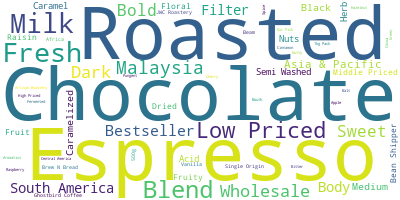

In [20]:
WordCloud(background_color='white').generate_from_frequencies(wordList).to_image()